# THE SPARK FOUNDATION - TASK 5


## Exploring Supervised Machine Learning with Decision Tree

### AUTHOR - Pushpendra Kumar Chaudhari


In ‘Iris’ dataset we have to create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
# Importing libraries in Python

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns

In [2]:
#Filtering the warnings

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
iris = datasets.load_iris()

In [4]:
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

Creating a new column “Species” with target values from the dataset, I am using lambda function to apply a function so as to convert the target values which are 0,1,2 to the corresponding target values(“setosa”,”versicolor”,”virginica”)

In [5]:
data['Species']=iris['target']

In [6]:
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

In [7]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


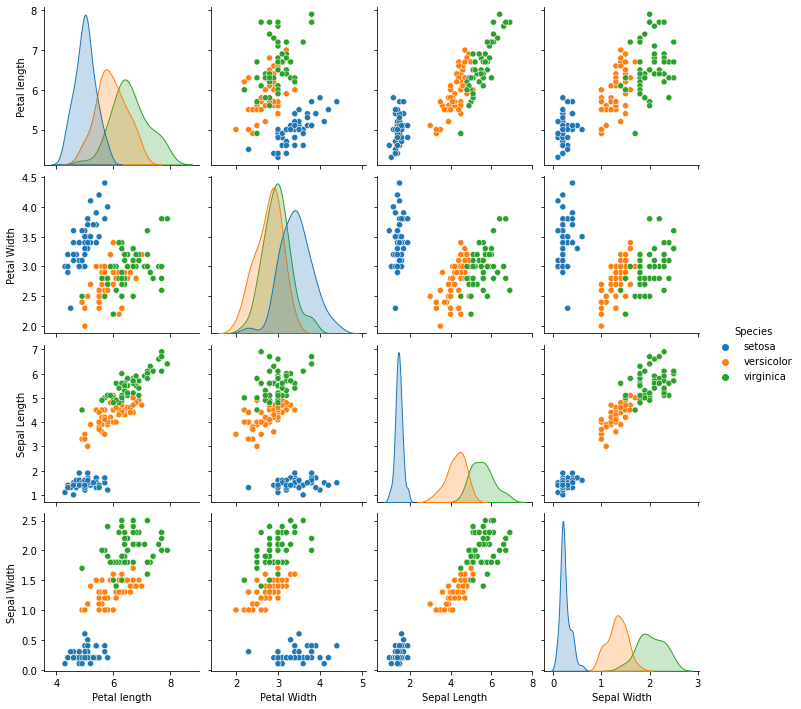

In [8]:
sns.pairplot(data, hue = 'Species')
plt.show()

We can easily observe that "iris-setosa" makes a distinctive cluster in every parameter, while the other two species are overlapping a bit on each other

## Let's check correlation using heatmap

[]

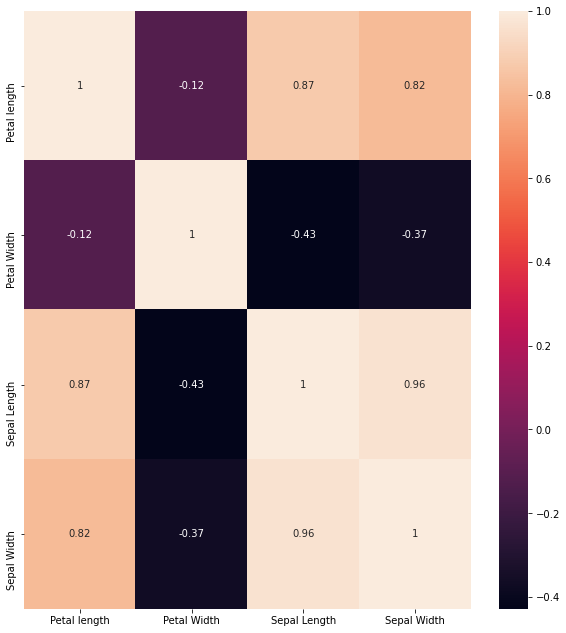

In [9]:
plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True)
plt.plot()

Observations made -

1. Petal length is highly related to petal width.
2. Sepal lenth is not related sepal width

<AxesSubplot:xlabel='Species', ylabel='Petal Width'>

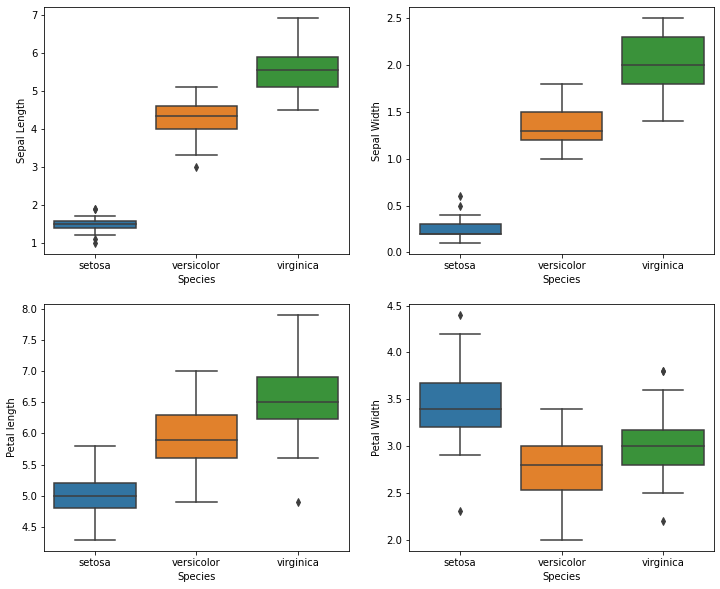

In [10]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="Sepal Length",data=data)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="Sepal Width",data=data)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="Petal length",data=data)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="Petal Width",data=data)


## Preparing the data for Model Building

In [11]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(data,test_size=0.3)

In [12]:
train_X=train[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
train_y=train.Species

In [13]:
test_X=test[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
test_y=test.Species

## Importing Decision Tree from Sklearn to build a classification model

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
DT = DecisionTreeClassifier(random_state=12)
model = DT.fit(train_X, train_y)

In [16]:
DT.predict(test_X)

array(['setosa', 'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'setosa', 'virginica', 'setosa', 'virginica', 'versicolor',
       'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'setosa'], dtype=object)

## Let's check accuracy of the model build

In [17]:
DT.score(test_X, test_y)

0.9333333333333333

In [18]:
#prediction
y_pred = DT.predict(test_X)

In [19]:
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(test_y, y_pred))

Accuracy Score: 0.9333333333333333


## As the model is now ready, moving ahead for the visualization of the Decision Tree

In [23]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(test_X,test_y)

In [24]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 2.45
|   |--- class: setosa
|--- feature_0 >  2.45
|   |--- feature_0 <= 4.85
|   |   |--- class: versicolor
|   |--- feature_0 >  4.85
|   |   |--- feature_1 <= 1.75
|   |   |   |--- feature_0 <= 5.05
|   |   |   |   |--- class: versicolor
|   |   |   |--- feature_0 >  5.05
|   |   |   |   |--- class: virginica
|   |   |--- feature_1 >  1.75
|   |   |   |--- class: virginica



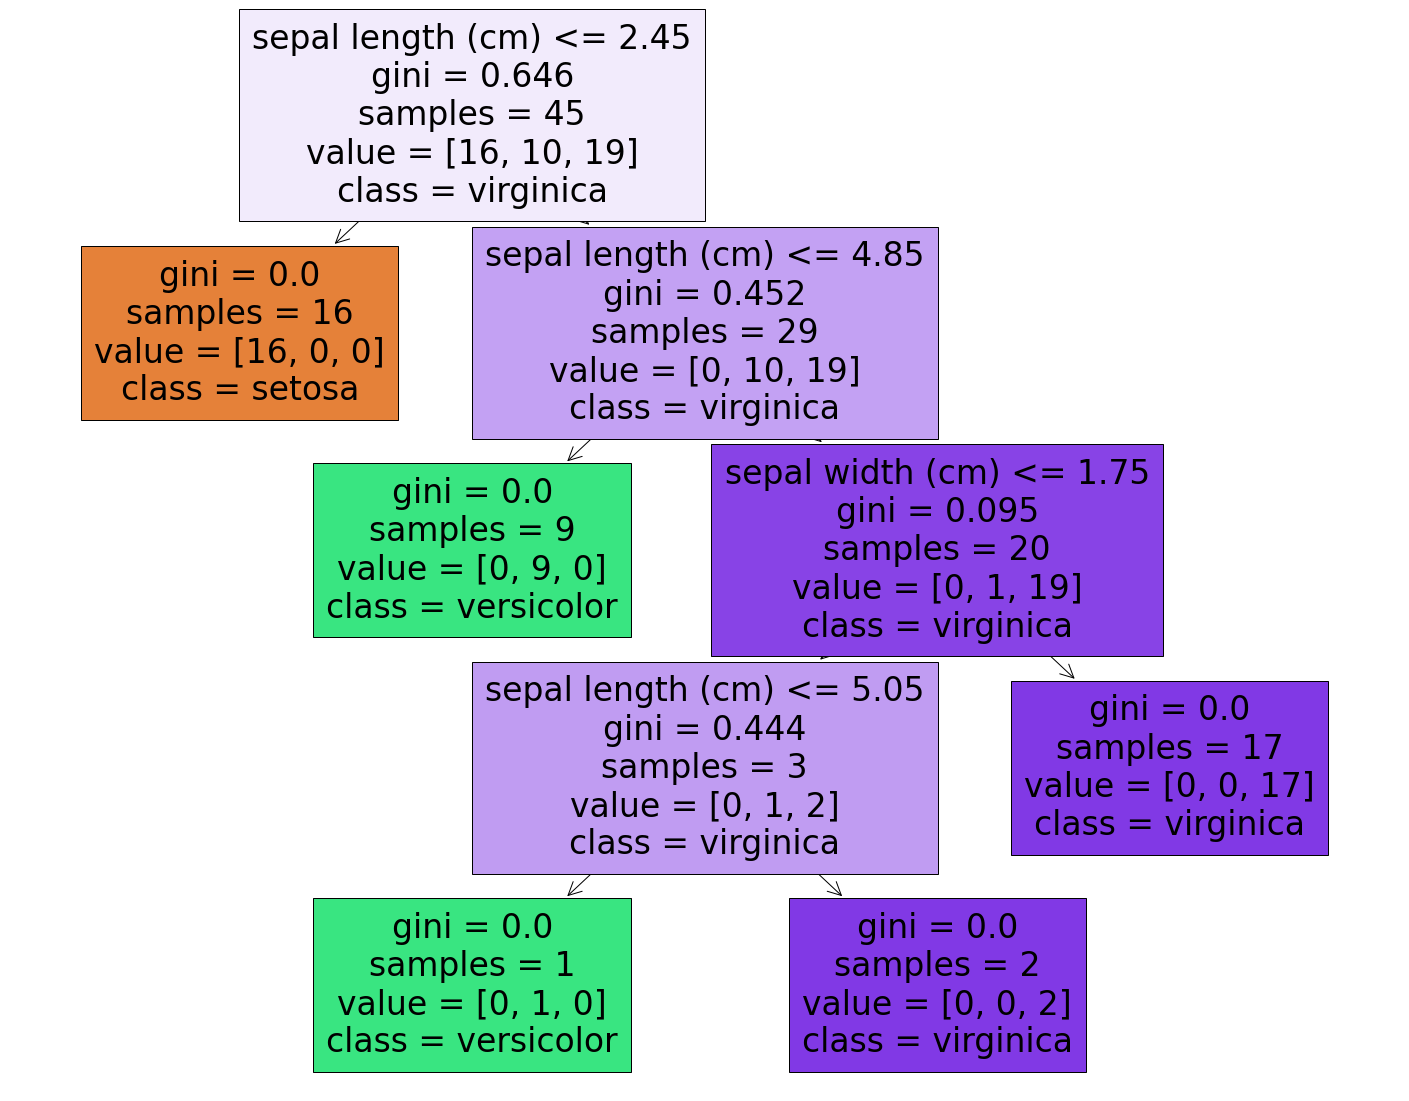

In [25]:
ig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

## Now feeding any new/test data to this classifer and it would be able to predict the right class accordingly.

In [26]:
DT.predict([[3.5, 1.9, 5.2, 2.4]])

array(['virginica'], dtype=object)

In [27]:
DT.predict([[4.6, 2.9, 3.6, 5.9]])

array(['virginica'], dtype=object)